### Introduction

This exercise is split in two parts: in 10.1 the simulated annealing method was applied to the Traveling Salesman Problem (TSP), while in 10.2 the genetic algorithm from Lecture 9 was modified using parallel computing. Results were compared to the ones from Lecture 9.

### 10.1 Simulated annealing

$\rightarrow$ prova3.cpp

The algorithm was developed using the class *chromosome* from Lecture 9. As reported in notebook 9, this class is composed of a a vector of integer numbers $ \in {1 , 2, ... , 32}$ representing cities and some functions acting on the single chromosome. Among the others, the following methods are worth mentioning:
1. <font face="Courier">pair permutation(*int* i)</font></span> $\rightarrow$ swap a city with the following one
2. <font face="Courier">shift(*int* quante_pos)</font></span> $\rightarrow$ shift all cities by random number of positions
3. <font face="Courier">permutation(*int* m)</font></span> $\rightarrow$ swap m cities with the remaining cities
4. <font face="Courier">pair inversion(*int* i, *int* m)</font></span> $\rightarrow$ swap two cities random
5. <font face="Courier">*double* L2()</font></span> $\rightarrow$ returning the cost function, in this case the L^{(2)} norm of the path:
$$
L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|^2
$$

Differently from Lecture 9 however, this time the program makes use of a single "chromosome". At the beginning all cities are placed in random order in the chromosome ( with the exception of number 1 which is always in the first place). At the algorithm performs Metropolis moves trying to modify the order to the cities. A function is picked randomly from the above list 1 to 4 (after a few mock tests of the algorithm, <font face="Courier">pair permutation</font></span> appeared to be less effective, so it was picked up with probability $\frac{1}{7}$, the other with probability $\frac{2}{7}$). Each proposed move is accepted or rejected with the Metropolis method, with . $\beta$ is an iperparameter which is increased gradually during the program run, according to the *annealing scheme*. In this way the fictitiuos temperature gradually decreases and variability decreases (lower acceptance rate) as the algorithm converges to configuration with the minumum $L^{(2)}$.

In this exercise the annealing scheme was composed of three different steps (see <font face="Courier">input2.dat</font></span>):

STEP 1:
- initial $\beta$ value = 0.05 (T = $\beta^{-1}$ = 20)
- First $\beta$ step length = 0.01
- How many $\beta$ steps with these first settings? 100
- How many Metropolis moves for each $\beta$ value? 1000

STEP 2:
- Second $\beta$ step length = 2.0
- How many $\beta$ steps with these settings? 75 (even with 100 is the same)
- How many Metropolis moves for each $\beta$ value? 10000

STEP 3:
- Third $\beta$ step length = 10.0
- How many $\beta$ steps with these settings? 75
- How many Metropolis moves for each $\beta$ value? 10000

As the $\beta$ step length increase, the temperature step length decreases (without reaching 0) and thus low temperatures are sampled more accurately as the algorithm converges.

At first the algorithm was applied to 32 cities randomly placed on a circumference.

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

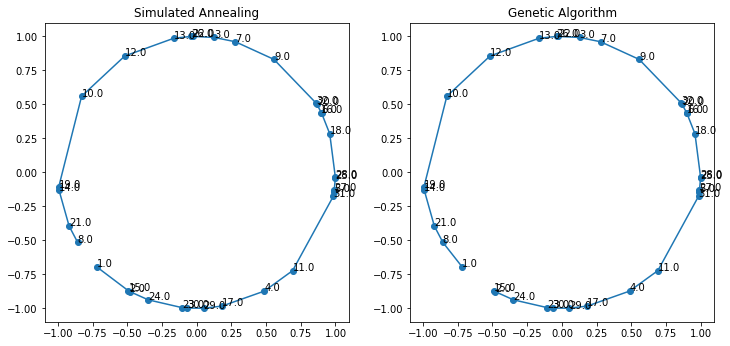

In [18]:
####Best path among 32 cities randomly placed on a circumference
M=32
x1 = np.loadtxt( 'circ_prova4_final_pos.dat',max_rows=M , usecols=3)
y1 = np.loadtxt( 'circ_prova4_final_pos.dat',max_rows=M , usecols=4 )
cities1 = np.loadtxt( 'circ_prova4_final_pos.dat',max_rows=M , usecols=2 )
x2 = np.loadtxt( './lez09/final_pos_5.dat',max_rows=M , usecols=3)
y2 = np.loadtxt( './lez09/final_pos_5.dat',max_rows=M , usecols=4 )
cities2 = np.loadtxt( './lez09/final_pos_5.dat',max_rows=M , usecols=2 )

plt.figure(figsize=(12,5.5))
plt.subplot(121)
plt.plot(x1, y1, '-o')
plt.title("Simulated Annealing", size=12)
for i, txt in enumerate(cities1):
    plt.annotate(txt, (x1[i], y1[i]))
plt.subplot(122)
plt.plot(x2, y2, '-o')
plt.title("Genetic Algorithm", size=12)
for i, txt in enumerate(cities2):
    plt.annotate(txt, (x2[i], y2[i]))

**With SA:** Shortest route:
$[ 1 \ \ 15 \ \  2 \ \  24 \ \ 23 \ \ 30 \ \ 29 \ \ 17 \ \ 4 \ \ 11 \ \ 31 \ \ 5 \ \ 27 \ \ 25 \ \ 28 \ \ 18 \ \ 6 \ \ 16 \ \ 20 \ \ 32 \ \ 9 \ \ 7 \ \ 3 \ \ 22 \ \ 26 \ \ 13 \ \ 12 \ \ 10 \ \ 19 \ \ 14 \ \ 21 \ \ 8 ]$

$L^{(2)} = 2.19855$

**With GA:** Shortest route:
$[ 1 \ \  8 \  \ 21 \ \  14 \ \ 19 \ \ 10 \ \ 12 \ \ 13 \ \  26 \ \ 22 \ \ 3 \ \ 7  \ \ 9 \ \ 32 \ \ 20  \ \ 16 \ \ 6 \ \ 18 \ \ 28 \ \ 25 \ \ 27 \ \ 5 \ \ 31 \ \ 11 \ \ 4 \ \ 17 \ \ 29 \ \ 30 \ \ 23 \ \ 24 \ \ 2 \ \ 15 ]$

$L^{(2)} = 2.19855$

The two codes give the same result (one clockwise and one counterclockwise).

The graph below shows the trend of $L^{(2)}$ with the algorithm iteration, compared with the one in Lecture 9. In the case of Simulated Annealing, the graph shows $L^{(2)}$ final values got for each $\beta$ step. It is possible to notice that there is a great variability for low $\beta$ values (low $\beta \rightarrow$ high acceptance rate $\rightarrow$ even "wrong" moves have a considerable probability to be accepted). On the other hand, for higher $\beta$ values the trend is stricly monotone. 

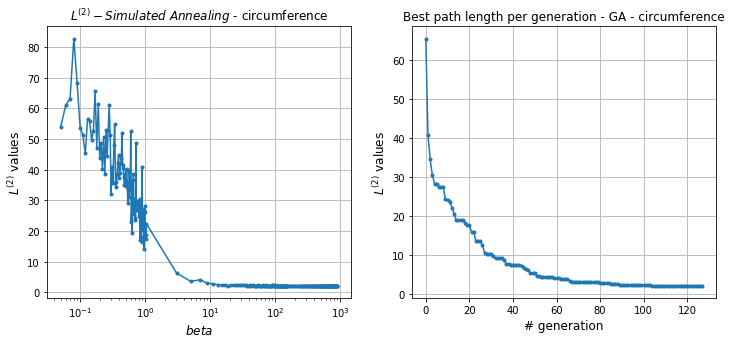

In [22]:
##CIRCUMFERENCE - trend of $L^(2)$ with beta
L = np.loadtxt( 'circ_prova4_temp.dat', usecols = 4)
temp = np.loadtxt( 'circ_prova4_temp.dat', usecols = 0)
l_best = np.loadtxt( './lez09/l2_solo_primo_5.dat' )
x_b = np.arange(len(l_best))

plt.figure(figsize=(12,5))

plt.subplot(121)
plt.plot(beta, L, marker = "o", markersize=3)
plt.xscale("log")
plt.xlabel("$ beta $" , size=12)
plt.ylabel("$ L^{(2)}$ values", size=12)
plt.title("$L^{(2)} - Simulated \ Annealing  $ - circumference", size=12)
plt.grid(True)

plt.subplot(122)
plt.plot(x_b, l_best, marker = "o", markersize=3)
plt.xlabel("# generation", size=12)
plt.ylabel("$L^{(2)}$ values", size=12)
plt.title("Best path length per generation - GA - circumference", size=12)
plt.grid(True)

The algorithm was then applied to 32 cities randomly placed inside a square, as in Lecture 9.

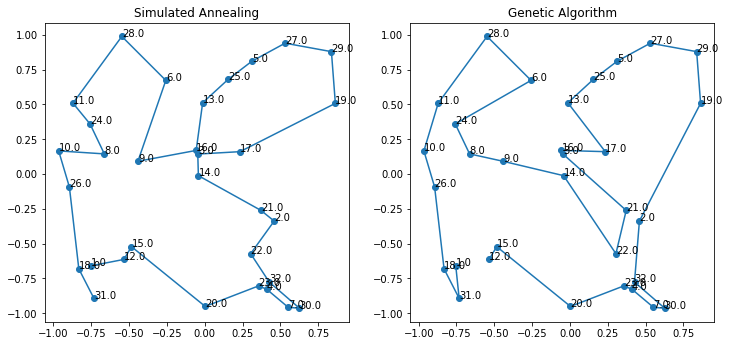

In [17]:
##Best path among 32 cities randomly placed inside a square
M=32
x1 = np.loadtxt( 'square_prova3_final_pos.dat',max_rows=M , usecols=3)
y1 = np.loadtxt( 'square_prova3_final_pos.dat',max_rows=M , usecols=4 )
cities1 = np.loadtxt( 'square_prova3_final_pos.dat',max_rows=M , usecols=2 )
x2 = np.loadtxt( './lez09/final_pos_square1.dat',max_rows=M , usecols=3)
y2 = np.loadtxt( './lez09/final_pos_square1.dat',max_rows=M , usecols=4 )
cities2 = np.loadtxt( './lez09/final_pos_square1.dat',max_rows=M , usecols=2 )

plt.figure(figsize=(12,5.5))
plt.subplot(121)
plt.plot(x1, y1, '-o')
plt.title("Simulated Annealing", size=12)
for i, txt in enumerate(cities1):
    plt.annotate(txt, (x1[i], y1[i]))
plt.subplot(122)
plt.plot(x2, y2, '-o')
plt.title("Genetic Algorithm", size=12)
for i, txt in enumerate(cities2):
    plt.annotate(txt, (x2[i], y2[i]))

**With SA:** Shortest route:
$[ 1 \ \  12 \ \ 15 \ \ 20 \ \ 23 \ \ 4 \ \ 7 \ \ 30 \  \ 32 \ \ 22 \ \ 2 \ \ 21 \ \ 14 \ \ 3 \ \ 17 \ \ 19 \ \ 29 \ \ 27 \ \ 5 \ \  25 \ \ 13 \ \ 16 \ \ 9 \ \ 6 \ \ 28 \ \ 11 \ \ 24 \ \ 8 \ \ 10 \ \ 26 \ \ 18 \ \ 31 ]$

$L^{(2)} =  4.03363 $

**With GA:** Shortest route: $[ 1 \ \ 31 \ \ 18 \ \ 26 \ \ 10 \ \ 11 \ \ 28 \ \ 6 \ \ 24 \ \ 8 \ \ 9 \ \ 14 \ \ 22 \ \ 21 \ \ 3 \ \ 16 \ \ 17 \ \ 13 \ \ 25 \ \ 5 \ \ 27 \ \ 29 \ \ 19 \ \ 2 \ \ 32 \ \ 30 \ \ 7 \ \ 4 \ \ 23 \ \ 20 \ \ 15 \ \ 12 ]$

$L^{(2)} = 5.17231$

In this case the SA code gives a better result than the GA.

The graph below shows the trend of $L^{(2)}$ with the algorithm iteration, compared with the one in Lecture 9. As before, the SA graph is characterized by great instability in $L^{(2)}$ for low $\beta$ values and a monotone trend for higher $\beta$ values.

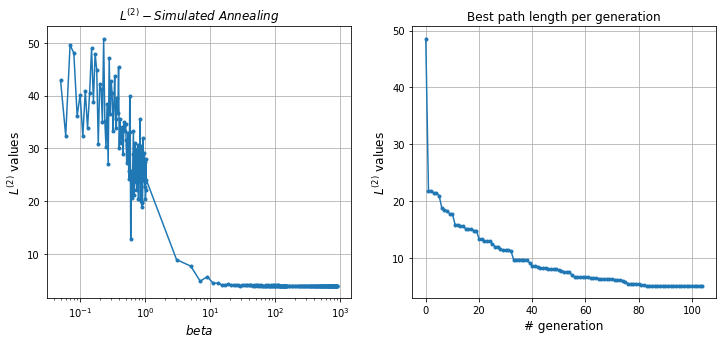

In [10]:
##SQUARE - trend of $L^(2)$ with beta
L = np.loadtxt( 'square_prova3_temp.dat', usecols = 4)
beta = np.loadtxt( 'square_prova3_temp.dat', usecols = 0)
l_best = np.loadtxt( './lez09/l2_solo_primo_square1.dat' )
x_b = np.arange(len(l_best))

plt.figure(figsize=(12,5))

plt.subplot(121)
plt.plot(beta, L, marker = "o", markersize=3)
plt.xscale("log")
plt.xlabel("$ beta $" , size=12)
plt.ylabel("$ L^{(2)}$ values", size=12)
plt.title("$L^{(2)} - Simulated \ Annealing  $", size=12)
plt.grid(True)

plt.subplot(122)
plt.plot(x_b, l_best, marker = "o", markersize=3)
plt.xlabel("# generation", size=12)
plt.ylabel("$L^{(2)}$ values", size=12)
plt.title("Best path length per generation", size=12)
plt.grid(True)

### 10.2

In this part the genetic algorithm code from Lecutre 9 was modified introducing 4 parallel searches through the MPI libraries. The algorithm was applide to 32 cities randomly placed within a square a side $l=2$. Each rank performs an independent search of the shortest path with the same parameters as in Lecture 9. However, every $N_{migr}=50$ generations they exchange in pairs their best individuals. Pairs are randomly choosen at each migration, i.e. rank 0 and another randomly picked node swap their best chromosome, while the remining two do the same within themselves.

The pictures below report the final best path in the four nodes.

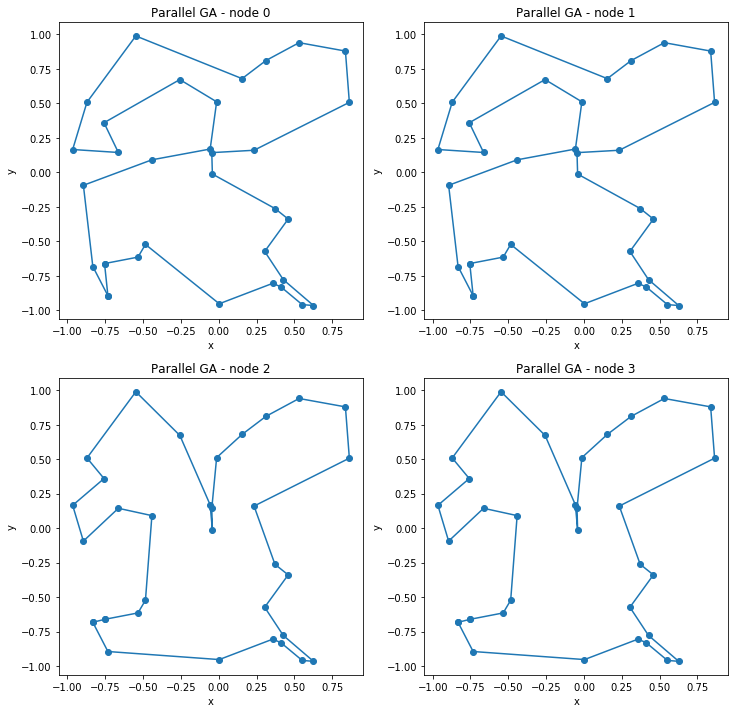

In [23]:
##Best path among 32 cities randomly placed inside a square
M=32
xs = []
ys = []
citiess = []

for i in range(4):
    x = np.loadtxt( './10.2/Outfilesok/first_vec'+ str(i) + '.dat',max_rows=M , usecols=1)
    y = np.loadtxt( './10.2/Outfilesok/first_vec'+ str(i) + '.dat',max_rows=M , usecols=2 )
    cities = np.loadtxt( './10.2/Outfilesok/first_vec'+ str(i) + '.dat',max_rows=M , usecols=0 )
    xs.append(x)
    ys.append(y)
    citiess.append(cities)

plt.figure(figsize=(12,12))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.plot(xs[i], ys[i], '-o')
    plt.plot([xs[i][31],xs[i][0]], [ys[i][31],ys[i][0]], '-o', color="C0")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Parallel GA - node " + str(i), size=12)

**Node 0 and 1**

Final route: $[ 1 \ \ 12 \ \ 15 \ \ 20 \ \ 23 \ \ 4 \ \ 7 \ \ 30 \ \ 32 \ \ 22 \ \ 2 \ \ 21 \ \ 14 \ \  3  \ \ 17 \ \ 19 \ \ 29 \ \ 27 \ \ 5 \ \ 25  \ \ 28 \ \ 11 \ \ 10 \ \ 8 \ \  24 \ \ 6 \ \ 13 \ \ 16 \ \ 9 \ \ 26 \ \ 18 \ \ 31 ]
$

Route length: 4.70232

**Node 2 and 3**

Final route: $[ 1 \ \ 12 \ \ 15 \ \ 9 \ \ 8 \ \ 26 \ \ 10 \ \ 24 \ \ 11 \ \  28 \ \  6  \ \ 16 \ \ 14 \ \ 3 \ \ 13 \ \  25 \ \  5 \ \  27 \ \ 29 \ \  19 \ \ 17 \ \ 21 \ \ 2 \ \  22 \ \ 32 \ \   30 \ \  7 \ \  4 \ \ 23 \ \  20 \ \  31 \ \  18 \ \  ]
$

Route length: 3.93421

The following graphs compare the best result of parallel GA (node 3) and non parallel GA.

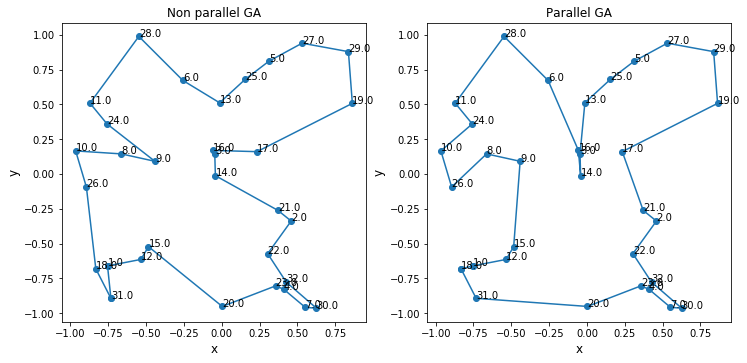

In [44]:
##Best path among 32 cities randomly placed inside a square
M=32
x1 = np.loadtxt( './Outfiles09/final_pos_new4.dat',max_rows=M , usecols=3)
y1 = np.loadtxt( './Outfiles09/final_pos_new4.dat',max_rows=M , usecols=4 )
cities1 = np.loadtxt( './Outfiles09/final_pos_new4.dat',max_rows=M , usecols=2 )
x2 = np.loadtxt( './10.2/Outfilesok/first_vec3.dat',max_rows=M , usecols=1)
y2 = np.loadtxt( './10.2/Outfilesok/first_vec3.dat',max_rows=M , usecols=2 )
cities2 = np.loadtxt( './10.2/Outfilesok/first_vec3.dat',max_rows=M , usecols=0 )

plt.figure(figsize=(12,5.5))
plt.subplot(121)
plt.plot(x1, y1, '-o')
plt.plot([x1[31], x1[0]] , [y1[31], y1[0]] , "-o", color = "C0")
plt.xlabel("x",size=12)
plt.ylabel("y",size=12)
plt.title("Non parallel GA", size=12)
for i, txt in enumerate(cities1):
    plt.annotate(txt, (x1[i], y1[i]))
    
plt.subplot(122)
plt.plot(x2, y2, '-o')
plt.plot([x2[31], x2[0]] , [y2[31], y2[0]] , "-o", color = "C0")
plt.xlabel("x",size=12)
plt.ylabel("y",size=12)
plt.title("Parallel GA", size=12)
for i, txt in enumerate(cities2):
    plt.annotate(txt, (x2[i], y2[i]))

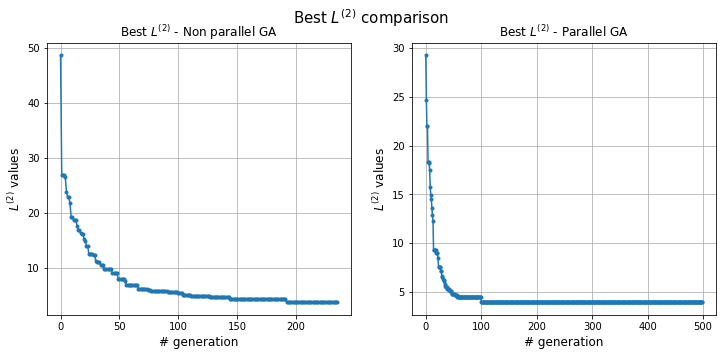

In [37]:
##SQUARE - trend of best $L^(2)$ with generations
l_best_par = np.loadtxt( './10.2/Outfilesok/lfirst3.dat')
l_best = np.loadtxt( './Outfiles09/l2_first_new4.dat' )

plt.figure(figsize=(12,5))
plt.suptitle("Best $L^{(2)}$ comparison", size=15)

plt.subplot(121)
plt.plot(np.arange(len(l_best)),l_best, marker = "o", markersize=3)
plt.xlabel("# generation" , size=12)
plt.ylabel("$ L^{(2)}$ values", size=12)
plt.title("Best $L^{(2)}$ - Non parallel GA ", size=12)
plt.grid(True)

plt.subplot(122)
plt.plot(np.arange(len(l_best_par)),l_best_par, marker = "o", markersize=3)
plt.xlabel("# generation" , size=12)
plt.ylabel("$ L^{(2)}$ values", size=12)
plt.title("Best $L^{(2)}$ - Parallel GA ", size=12)
plt.grid(True)

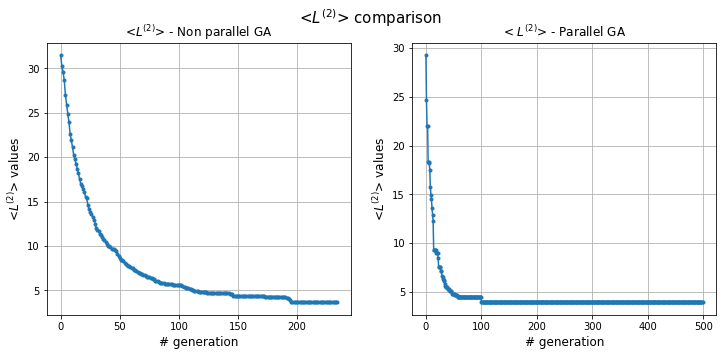

In [40]:
##SQUARE - trend of <$L^(2)$> with generations
lave_par = np.loadtxt( './10.2/Outfilesok/lave3.dat')
lave = np.loadtxt( './Outfiles09/l2_values_new4.dat' )

plt.figure(figsize=(12,5))
plt.suptitle("<$L^{(2)}$> comparison", size=15)

plt.subplot(121)
plt.plot(np.arange(len(lave)),lave, marker = "o", markersize=3)
plt.xlabel("# generation" , size=12)
plt.ylabel("<$ L^{(2)}$> values", size=12)
plt.title("<$L^{(2)}$> - Non parallel GA ", size=12)
plt.grid(True)

plt.subplot(122)
plt.plot(np.arange(len(l_best_par)),l_best_par, marker = "o", markersize=3)
plt.xlabel("# generation" , size=12)
plt.ylabel("<$ L^{(2)}$> values", size=12)
plt.title("< $L^{(2)}$> - Parallel GA ", size=12)
plt.grid(True)